# 1. Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Dataset

In [3]:
# Load dataset
df = pd.read_csv("Global_Superstore(CSV).csv")
 # Display first 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


#   3. Data Cleaning

### 3.1 Handle Missing Value

In [4]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())
 # Fill missing values with mean/median (for numerical) or mode (for categor
df.fillna(df.mean(), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)  

Missing Values:
 Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Postal Code       806
City                0
State               0
Country             0
Region              0
Market              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
dtype: int64


C:\Users\Sujith\AppData\Local\Temp\ipykernel_17488\1463389262.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


###  3.2 Remove Duplicate

In [5]:
print("Duplicate Rows:", df.duplicated().sum())
 # Remove duplicates
df.drop_duplicates(inplace=True)

Duplicate Rows: 0


###  3.3 Handle Outliers using IQR

In [13]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
 # Apply to numerical columns
for col in ['Sales', 'Profit']:  # Update based on your dataset
    df = remove_outliers_iqr(df, col)

# 4. Statistical Analysis

In [14]:
# Summary statistics
print(df.describe())

# Correlation matrix
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)
display(correlation_matrix)

             Row ID   Postal Code        Sales    Quantity    Discount  \
count    922.000000    922.000000   922.000000  922.000000  922.000000   
mean   25102.404555  54014.195602  1543.690770    5.309111    0.084544   
std    12958.762344  15372.237311  1054.886752    2.572911    0.135084   
min       58.000000   2920.000000     1.910000    1.000000    0.000000   
25%    15139.500000  53966.170103   775.965000    3.000000    0.000000   
50%    25212.000000  53966.170103  1494.705000    5.000000    0.000000   
75%    34752.750000  53966.170103  2290.282500    7.000000    0.150000   
max    51284.000000  98198.000000  4876.880000   14.000000    0.800000   

            Profit  Shipping Cost  
count   922.000000     922.000000  
mean    267.331681     262.706054  
std     352.118329     173.322167  
min    -706.250000       1.070000  
25%      11.772500     207.452500  
50%     182.545000     254.730000  
75%     483.720000     336.965000  
max    1246.800000     923.630000  
Correlati

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,0.010540,-0.284112,-0.197647,0.037577,-0.099590,-0.302546
Postal Code,0.010540,1.000000,0.003312,-0.010809,0.047821,-0.009577,-0.003601
Sales,-0.284112,0.003312,1.000000,0.511314,-0.217251,0.514805,0.671624
Quantity,-0.197647,-0.010809,0.511314,1.000000,-0.032787,0.172346,0.321961
Discount,0.037577,0.047821,-0.217251,-0.032787,1.000000,-0.424535,-0.204172
Profit,-0.099590,-0.009577,0.514805,0.172346,-0.424535,1.000000,0.365733
Shipping Cost,-0.302546,-0.003601,0.671624,0.321961,-0.204172,0.365733,1.000000


# 5. Data Visualization

## 5.1 Histogram for Numerical Data Distribution

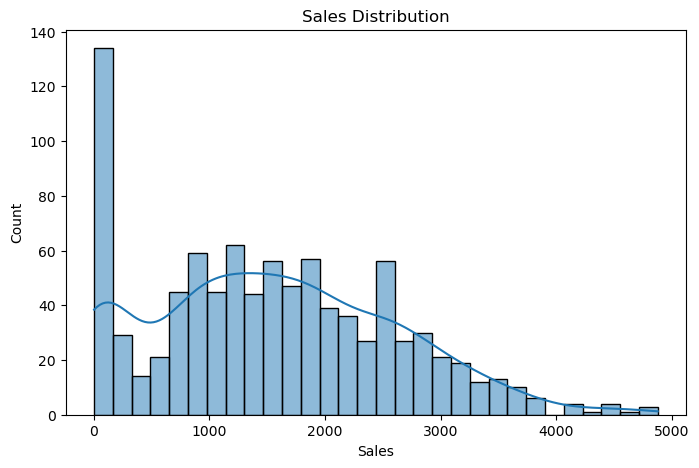

In [15]:
# Histogram of Sales
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'],bins=30,kde=True)
plt.title('Sales Distribution')
plt.show()

###  5.2 Boxplot for Outliers

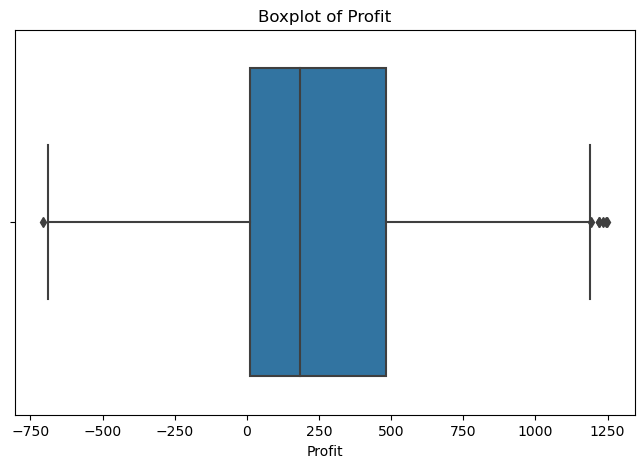

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Profit'])
plt.title('Boxplot of Profit')
plt.show()

### 5.3 Heatmap for Correlation

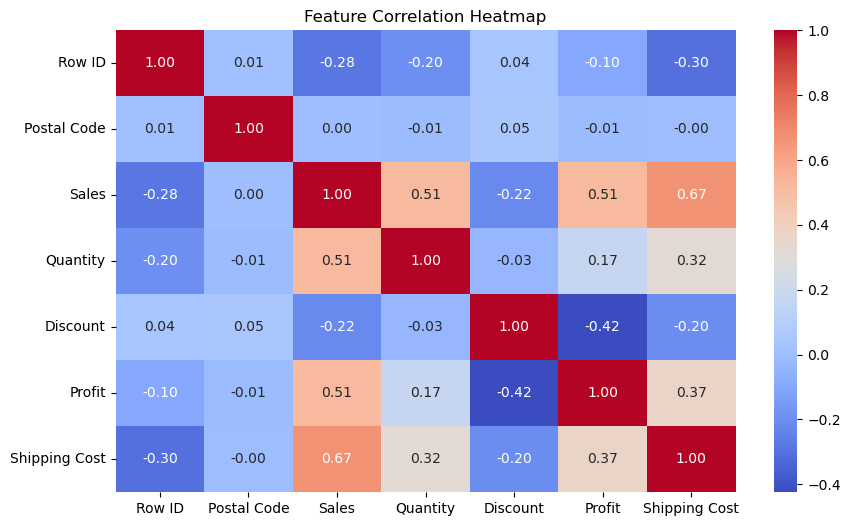

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()